# Stage 1: Data Cleaning, Preprocessing and exploratory data analysis including topic modelling

Stage 1: Data cleaning, preprocessing, and exploratory data analysis including topic modelling

In this step, students get a first overview of the dataset and learn to prepare it for the subsequent NLP analyses. This could involve the following tasks:

- Data Collection and Cleaning
     - Acquire a comprehensive dataset of cleantech texts.
     - Perform data cleaning to remove irrelevant information, special characters, and duplicates.
- Text Preprocessing
    - Tokenize the text data into words or phrases.
    - Apply stemming or lemmatization to reduce words to their root form.
    - Remove stop words and non-informative terms.
    - Convert text to lowercase for consistency.
    - Exploratory Data Analysis (EDA)
    - Compute basic statistics such as word counts, document lengths, and term frequencies.
    - Create word clouds to visualize the most frequent terms.
    - Plot histograms or bar charts to analyze the distribution of major cleantech topics and categories.
    - Identify outliers or anomalies in the data.
    - Visualize the distribution of texts with scatter plots or other suitable visualization techniques.
- Topic Modeling
    - Test topic modeling techniques such as LDA and NMF
    (https://github.com/AnushaMeka/NLP-Topic-Modeling-LDA-NMF), Top2Vec
    (https://github.com/ddangelov/Top2Vec) and BERTopic
    (https://github.com/MaartenGr/BERTopic).
    - Visualize and interpret the discovered topics using techniques like word clouds or topic proportion distribution plots.
    - Evaluate the quality of the topics.
    - Refine the topic model based on evaluation results and domain expertise.

Outputs:
- Notebook with data cleaning and preprocessing steps.
- EDA notebook with visualizations on e.g., hidden topics.

## Import Libraries

In [1]:
!python -m spacy download en_core_web_sm

import numpy as np
import pandas as pd
import nltk
import spacy
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import punctuation
import re

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 16.6 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
# Download nltk packages
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/nina/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/nina/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/nina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Load the Data

First step is to load data from the csv file into a dataframe.

In [177]:
df = pd.read_csv("/Users/nina/Downloads/cleantech_media_dataset_v1_20231109.csv")

In [166]:
# Inspect dataframe
pd.DataFrame.head(df)

Unnamed: 0                                                title  \
0        1280   Qatar to Slash Emissions as LNG Expansion Advances   
1        1281                 India Launches Its First 700 MW PHWR   
2        1283                New Chapter for US-China Energy Trade   
3        1284  Japan: Slow Restarts Cast Doubt on 2030 Energy Plan   
4        1285       NYC Pension Funds to Divest Fossil Fuel Shares   

         date author  \
0  2021-01-13    NaN   
1  2021-01-15    NaN   
2  2021-01-20    NaN   
3  2021-01-22    NaN   
4  2021-01-25    NaN   

                                                                                               content  \
0  ["Qatar Petroleum ( QP) is targeting aggressive cuts in its greenhouse gas emissions as it prepa...   
1  ["• Nuclear Power Corp. of India Ltd. ( NPCIL) synchronized Kakrapar-3 in the western state of G...   
2  ["New US President Joe Biden took office this week with the US-China relationship at its worst i...   
3  ["The slow pace of Japanese reactor restarts continues to cast doubt on the goal of the governme...   
4  ["Two of New York City's largest pension funds say they will divest roughly $ 4 billion in share...   

        domain  \
0  energyintel   
1  energyintel   
2  energyintel   
3  energyintel   
4  energyintel   

                                                                url  
0  https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de685b0000  
1  https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de6c710001  
2  https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de735a0000  
3  https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de79160000  
4  https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de7d9e0000

The article contents are contained in the 'content' column. This will be the main target for the topic modelling. The author column appears to contain mainly NaNs.

In [149]:
# Inspect dataframe shape
df.shape

(9607, 7)

The dataframe contains 9607 records and 7 attributes.

In [150]:
# Check for NAs
print(df.isnull().sum())

Unnamed: 0       0
title            0
date             0
author        9576
content          0
domain           0
url              0
dtype: int64


There are no NAs in the title or content columns which are the most important for topic modelling.

### Preprocessing

We create a function to apply the first preprocessing steps. This includes dropping any duplicated records, changing the contents to lower case, removing non alpha-numeric characters, tokenizing the contents and adding a word count.

In [178]:
def preprocess_data(df):
    # Remove duplicates
    df = df.drop_duplicates()
    
    # Convert content to lower case
    df['content_cleaned'] = df['content'].apply(lambda x: x.lower())
    
    # Remove symbols and punctuation (not sure about this step)
    df['content_cleaned'] = df['content_cleaned'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))
    
    # Tokenize
    df['tokenized_content'] = df['content_cleaned'].apply(lambda x: nltk.word_tokenize(x))
    
    # Add word count column
    df['word_count'] = df['tokenized_content'].apply(lambda x: len(x))
    
    # Remove unused columns
    df.drop('Unnamed: 0', axis=1, inplace=True)
    df.drop('author', axis=1, inplace=True)

    return df

df = preprocess_data(df)

In [152]:
df[['content_cleaned', 'tokenized_content', 'word_count']].head()

content_cleaned  \
0  qatar petroleum  qp is targeting aggressive cuts in its greenhouse gas emissions as it prepares ...   
1   nuclear power corp of india ltd  npcil synchronized kakrapar3 in the western state of gujarat t...   
2  new us president joe biden took office this week with the uschina relationship at its worst in d...   
3  the slow pace of japanese reactor restarts continues to cast doubt on the goal of the government...   
4  two of new york citys largest pension funds say they will divest roughly  4 billion in shares of...   

                                                                                     tokenized_content  \
0  [qatar, petroleum, qp, is, targeting, aggressive, cuts, in, its, greenhouse, gas, emissions, as,...   
1  [nuclear, power, corp, of, india, ltd, npcil, synchronized, kakrapar3, in, the, western, state, ...   
2  [new, us, president, joe, biden, took, office, this, week, with, the, uschina, relationship, at,...   
3  [the, slow, pace, of, japanese, reactor, restarts, continues, to, cast, doubt, on, the, goal, of...   
4  [two, of, new, york, citys, largest, pension, funds, say, they, will, divest, roughly, 4, billio...   

   word_count  
0         442  
1         538  
2         706  
3         687  
4         394

Next we can lemmatize words and remove stop words. In the next step we compare two lemmatizers: nltk and spaCy.

In [153]:
# Create lemmatizer
lemmatizer = nltk.WordNetLemmatizer()
nltk_lemma = df['tokenized_content'].apply(lambda x:
                    [lemmatizer.lemmatize(word) for word in x])

nltk_lemma

0       [qatar, petroleum, qp, is, targeting, aggressive, cut, in, it, greenhouse, gas, emission, a, it,...
1       [nuclear, power, corp, of, india, ltd, npcil, synchronized, kakrapar3, in, the, western, state, ...
2       [new, u, president, joe, biden, took, office, this, week, with, the, uschina, relationship, at, ...
3       [the, slow, pace, of, japanese, reactor, restarts, continues, to, cast, doubt, on, the, goal, of...
4       [two, of, new, york, city, largest, pension, fund, say, they, will, divest, roughly, 4, billion,...
                                                       ...                                                 
9602    [stratum, clean, energy, ha, closed, a, 300, million, revolving, loan, and, letter, of, credit, ...
9603    [global, renewable, energy, developer, rsted, is, deploying, sparkcognition, s, renewable, suite...
9604    [veolia, north, america, a, provider, of, environmental, solution, in, the, u, and, canada, ha, ...
9605    [once, the, selfproc

Here we can see that the nltk lemmatizer has removed the -s from "us" (line 2) and "has" (line 9606). It also hasn't successfully lemmatized words such as "closed", "leading" etc. This could cause problems when do the topic modelling. Next we see if the spaCy lemmatizer has the same problems.

In [154]:
nlp = spacy.load('en_core_web_sm', disable=["ner", "parser"])

In [ ]:
# Apply spacy lemmatizer
spacy_lemma = df['tokenized_content'].apply(lambda x:
                    [token.lemma_ for token in nlp(" ".join(x))])

In [155]:
spacy_lemma = df['tokenized_content'].apply(lambda x:
                    [token.lemma_ for token in nlp(" ".join(x))])
spacy_lemma

0       [qatar, petroleum, qp, be, target, aggressive, cut, in, its, greenhouse, gas, emission, as, it, ...
1       [nuclear, power, corp, of, india, ltd, npcil, synchronize, kakrapar3, in, the, western, state, o...
2       [new, us, president, joe, biden, take, office, this, week, with, the, uschina, relationship, at,...
3       [the, slow, pace, of, japanese, reactor, restart, continue, to, cast, doubt, on, the, goal, of, ...
4       [two, of, new, york, city, large, pension, fund, say, they, will, divest, roughly, 4, billion, i...
                                                       ...                                                 
9602    [strata, clean, energy, have, close, a, 300, million, revolving, loan, and, letter, of, credit, ...
9603    [global, renewable, energy, developer, rste, be, deploy, sparkcognition, s, renewable, suite, ac...
9604    [veolia, north, america, a, provider, of, environmental, solution, in, the, us, and, canada, hav...
9605    [once, the, selfproc

The spaCy lemmatizer seems to have done a better job. So we will use this for our processing.

In [179]:
df['lemmatized_content'] = spacy_lemma

In [191]:
df.head()

title        date  \
0   Qatar to Slash Emissions as LNG Expansion Advances  2021-01-13   
1                 India Launches Its First 700 MW PHWR  2021-01-15   
2                New Chapter for US-China Energy Trade  2021-01-20   
3  Japan: Slow Restarts Cast Doubt on 2030 Energy Plan  2021-01-22   
4       NYC Pension Funds to Divest Fossil Fuel Shares  2021-01-25   

                                                                                               content  \
0  ["Qatar Petroleum ( QP) is targeting aggressive cuts in its greenhouse gas emissions as it prepa...   
1  ["• Nuclear Power Corp. of India Ltd. ( NPCIL) synchronized Kakrapar-3 in the western state of G...   
2  ["New US President Joe Biden took office this week with the US-China relationship at its worst i...   
3  ["The slow pace of Japanese reactor restarts continues to cast doubt on the goal of the governme...   
4  ["Two of New York City's largest pension funds say they will divest roughly $ 4 billion in share...   

        domain  \
0  energyintel   
1  energyintel   
2  energyintel   
3  energyintel   
4  energyintel   

                                                                url  \
0  https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de685b0000   
1  https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de6c710001   
2  https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de735a0000   
3  https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de79160000   
4  https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de7d9e0000   

                                                                                       content_cleaned  \
0  qatar petroleum  qp is targeting aggressive cuts in its greenhouse gas emissions as it prepares ...   
1   nuclear power corp of india ltd  npcil synchronized kakrapar3 in the western state of gujarat t...   
2  new us president joe biden took office this week with the uschina relationship at its worst in d...   
3  the slow pace of japanese reactor restarts continues to cast doubt on the goal of the government...   
4  two of new york citys largest pension funds say they will divest roughly  4 billion in shares of...   

                                                                                     tokenized_content  \
0  [qatar, petroleum, qp, is, targeting, aggressive, cuts, in, its, greenhouse, gas, emissions, as,...   
1  [nuclear, power, corp, of, india, ltd, npcil, synchronized, kakrapar3, in, the, western, state, ...   
2  [new, us, president, joe, biden, took, office, this, week, with, the, uschina, relationship, at,...   
3  [the, slow, pace, of, japanese, reactor, restarts, continues, to, cast, doubt, on, the, goal, of...   
4  [two, of, new, york, citys, largest, pension, funds, say, they, will, divest, roughly, 4, billio...   

   word_count  \
0         442   
1         538   
2         706   
3         687   
4         394   

                                                                                    lemmatized_content  \
0  [qatar, petroleum, qp, be, target, aggressive, cut, in, its, greenhouse, gas, emission, as, it, ...   
1  [nuclear, power, corp, of, india, ltd, npcil, synchronize, kakrapar3, in, the, western, state, o...   
2  [new, us, president, joe, biden, take, office, this, week, with, the, uschina, relationship, at,...   
3  [the, slow, pace, of, japanese, reactor, restart, continue, to, cast, doubt, on, the, goal, of, ...   
4  [two, of, new, york, city, large, pension, fund, say, they, will, divest, roughly, 4, billion, i...   

                                                                                           stops_spacy  
0  [qatar, petroleum, qp, target, aggressive, cut, greenhouse, gas, emission, prepare, launch, phas...  
1  [nuclear, power, corp, india, ltd, npcil, synchronize, kakrapar3, western, state, gujarat, grid,...  
2  [new, president, joe, biden, office, week, uschina, relationship, bad, decade, energy, come, pla...  
3  [slow, pace, japan

Now we can remove stops. Below we test three different stop word lists.

In [180]:
# Remove stops
stop_words_nltk = set(nltk.corpus.stopwords.words("english"))
stops_nltk = df['lemmatized_content'].apply(lambda x:
                    [token for token in x if token not in stop_words_nltk])

stop_words_spacy = nlp.Defaults.stop_words
stops_spacy = df['lemmatized_content'].apply(lambda x: [word for word in x if word.lower() not in stop_words_spacy])

from gensim.parsing.preprocessing import STOPWORDS

stop_words_gensim = STOPWORDS
stops_gensim = df['lemmatized_content'].apply(lambda x: [word for word in x if word.lower() not in stop_words_gensim])

print(len(stops_gensim[0]))
print(len(stops_nltk[0]))
print(len(stops_spacy[0]))

259
279
259


Spacy and Gensim seem to have removed the same number of words. We can choose one of them as for our pre-processing.

In [183]:
df['stops_spacy'] = stops_spacy
df.head()

title        date  \
0   Qatar to Slash Emissions as LNG Expansion Advances  2021-01-13   
1                 India Launches Its First 700 MW PHWR  2021-01-15   
2                New Chapter for US-China Energy Trade  2021-01-20   
3  Japan: Slow Restarts Cast Doubt on 2030 Energy Plan  2021-01-22   
4       NYC Pension Funds to Divest Fossil Fuel Shares  2021-01-25   

                                                                                               content  \
0  ["Qatar Petroleum ( QP) is targeting aggressive cuts in its greenhouse gas emissions as it prepa...   
1  ["• Nuclear Power Corp. of India Ltd. ( NPCIL) synchronized Kakrapar-3 in the western state of G...   
2  ["New US President Joe Biden took office this week with the US-China relationship at its worst i...   
3  ["The slow pace of Japanese reactor restarts continues to cast doubt on the goal of the governme...   
4  ["Two of New York City's largest pension funds say they will divest roughly $ 4 billion in share...   

        domain  \
0  energyintel   
1  energyintel   
2  energyintel   
3  energyintel   
4  energyintel   

                                                                url  \
0  https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de685b0000   
1  https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de6c710001   
2  https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de735a0000   
3  https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de79160000   
4  https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de7d9e0000   

                                                                                       content_cleaned  \
0  qatar petroleum  qp is targeting aggressive cuts in its greenhouse gas emissions as it prepares ...   
1   nuclear power corp of india ltd  npcil synchronized kakrapar3 in the western state of gujarat t...   
2  new us president joe biden took office this week with the uschina relationship at its worst in d...   
3  the slow pace of japanese reactor restarts continues to cast doubt on the goal of the government...   
4  two of new york citys largest pension funds say they will divest roughly  4 billion in shares of...   

                                                                                     tokenized_content  \
0  [qatar, petroleum, qp, is, targeting, aggressive, cuts, in, its, greenhouse, gas, emissions, as,...   
1  [nuclear, power, corp, of, india, ltd, npcil, synchronized, kakrapar3, in, the, western, state, ...   
2  [new, us, president, joe, biden, took, office, this, week, with, the, uschina, relationship, at,...   
3  [the, slow, pace, of, japanese, reactor, restarts, continues, to, cast, doubt, on, the, goal, of...   
4  [two, of, new, york, citys, largest, pension, funds, say, they, will, divest, roughly, 4, billio...   

   word_count  \
0         442   
1         538   
2         706   
3         687   
4         394   

                                                                                    lemmatized_content  \
0  [qatar, petroleum, qp, be, target, aggressive, cut, in, its, greenhouse, gas, emission, as, it, ...   
1  [nuclear, power, corp, of, india, ltd, npcil, synchronize, kakrapar3, in, the, western, state, o...   
2  [new, us, president, joe, biden, take, office, this, week, with, the, uschina, relationship, at,...   
3  [the, slow, pace, of, japanese, reactor, restart, continue, to, cast, doubt, on, the, goal, of, ...   
4  [two, of, new, york, city, large, pension, fund, say, they, will, divest, roughly, 4, billion, i...   

                                                                                           stops_spacy  
0  [qatar, petroleum, qp, target, aggressive, cut, greenhouse, gas, emission, prepare, launch, phas...  
1  [nuclear, power, corp, india, ltd, npcil, synchronize, kakrapar3, western, state, gujarat, grid,...  
2  [new, president, joe, biden, office, week, uschina, relationship, bad, decade, energy, come, pla...  
3  [slow, pace, japan

Now we can make a wordcloud to get an idea of the most frequent terms in the entire corpus.

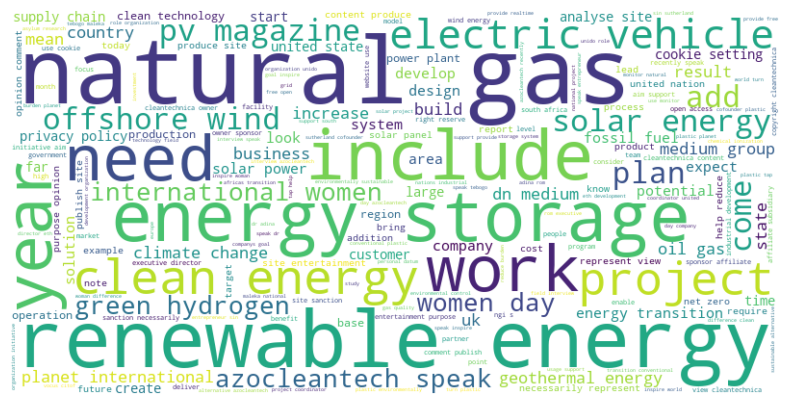

In [192]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join text for each doc
df['final_cleaned'] = df['stops_spacy'].apply(lambda x: ' '.join(x))

# Join all text
all_tokens_string = ' '.join(df['stops_spacy'].explode())

# Create wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tokens_string)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

From this wordcloud we can already see some potential topics. For example: natural gas, energy storage, offshore wind, electric vehicles, and solar energy. We can also see that the pre-processing has not cleaned out all redundant bits of information. For example "cookie setting" and "privacy policy" may need to be cleaned out of the corpus. This level of cleanliness may be enough to extract the main topics, however.

### Exploratory Analysis

First we can look at term frequencies. We can use nltk.probability.FreqDist to calculate the frequencies of terms in each document.

In [193]:
# Calculate term frequencies for each record
df['term_frequencies'] = df['stops_spacy'].apply(lambda x:
                        nltk.probability.FreqDist(x))

df['term_frequencies'].head()

0    {'qatar': 3, 'petroleum': 1, 'qp': 6, 'target': 3, 'aggressive': 1, 'cut': 1, 'greenhouse': 1, '...
1    {'nuclear': 4, 'power': 4, 'corp': 1, 'india': 1, 'ltd': 1, 'npcil': 4, 'synchronize': 1, 'kakra...
2    {'new': 1, 'president': 1, 'joe': 1, 'biden': 8, 'office': 1, 'week': 3, 'uschina': 2, 'relation...
3    {'slow': 1, 'pace': 1, 'japanese': 1, 'reactor': 8, 'restart': 8, 'continue': 1, 'cast': 1, 'dou...
4    {'new': 7, 'york': 7, 'city': 6, 'large': 1, 'pension': 4, 'fund': 6, 'divest': 1, 'roughly': 1,...
Name: term_frequencies, dtype: object

Then we can get the most frequent term for each document, and the number of documents that have the same most frequent word. The histogram below shows that a large number of documents have energy as the most frequent word, followed by solar, gas, hydrogen and geothermal. We can surmise that these technologies are the main topics of a large number of articles.

We also see that "s" is the most frequent term in a large number of documents. It may therefore be useful to go back and remove this in a further cleaning step.

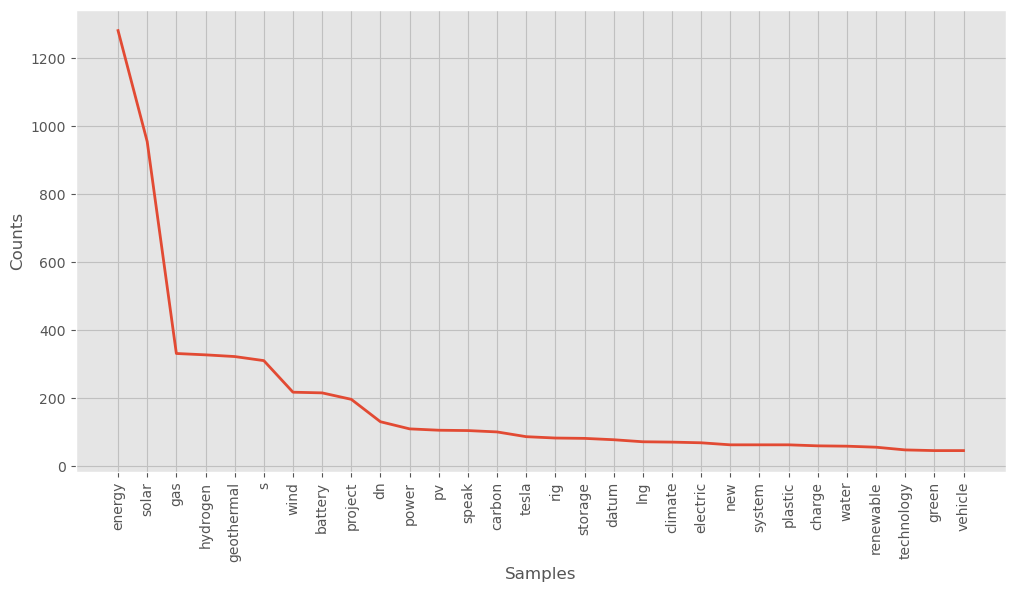

In [194]:
# Aggregate most frequent words across all documents
freq_words = [max(term, key=term.get) for term in df['term_frequencies']]
corpus_freq_dist = nltk.probability.FreqDist(freq_words)

# Plot histogram
plt.figure(figsize=(12, 6))
corpus_freq_dist.plot(30, cumulative=False)
plt.show()

In [195]:
freq_words[:10]

['million',
 'project',
 'china',
 'reactor',
 'new',
 'court',
 'energy',
 'china',
 'water',
 'power']

In [19]:
from pathlib import Path
from textblob import TextBlob

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
import plotly.graph_objs as go

import plotly.graph_objs as go
from plotly.offline import iplot
from IPython.core.interactiveshell import InteractiveShell

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

pd.options.display.max_colwidth = 100
pd.options.display.max_columns = 30

We can also take a closer look at the word frequencies by each "domain". First we can see how many articles come from each domain.

In [196]:
df['domain'].value_counts()

cleantechnica            1861
azocleantech             1627
pv-magazine              1215
energyvoice              1020
solarindustrymag          673
naturalgasintel           659
thinkgeoenergy            646
rechargenews              559
solarpowerworldonline     505
energyintel               234
pv-tech                   232
businessgreen             158
greenprophet               80
ecofriend                  38
solarpowerportal.co        34
eurosolar                  28
decarbxpo                  19
solarquarter               17
indorenergy                 2
Name: domain, dtype: int64

Next we can compare the first document from each of the top 3 domains.

In [197]:
# Compare three domains
cleantechnica = df[df['domain'] == 'cleantechnica']['final_cleaned']
azocleantech = df[df['domain'] == 'azocleantech']['final_cleaned']
pv_magazine = df[df['domain'] == 'pv-magazine']['final_cleaned']
print(f"pv_magazine: {pv_magazine[:1]}\nazocleantech: {azocleantech[:1]}\ncleantechnica: {cleantechnica[:1]}")

pv_magazine: 6948    pv magazine webinar discuss paul wormser cea elias hinckley k l gate irs safe harbor provision s...
Name: final_cleaned, dtype: object
azocleantech: 2629    click allow agree storing cookie device enhance site navigation analyse site usage support provi...
Name: final_cleaned, dtype: object
cleantechnica: 1284    installment threepart series community solar low moderateincome costumer piece focus partnership...
Name: final_cleaned, dtype: object


This is not too illuminating so we will instead go on to create a word cloud from all the documents in each of the top 3 domains.

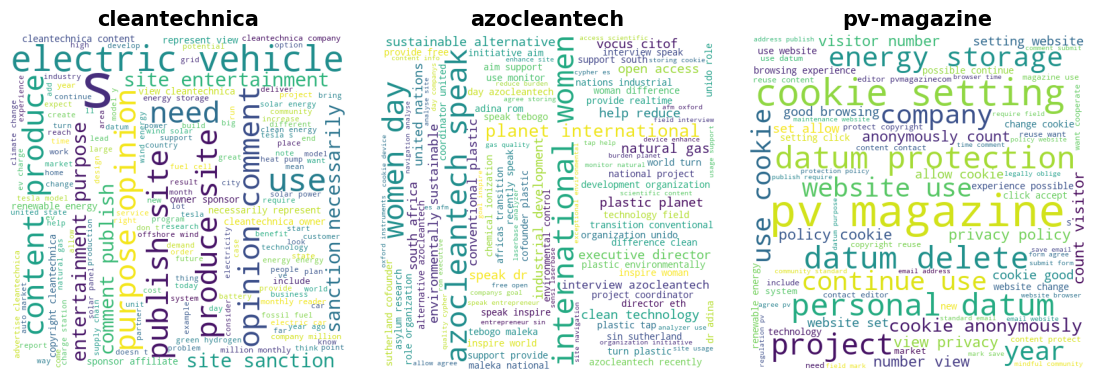

In [198]:
rows=1
cols=3

row=0
col=0
titles = ['cleantechnica', 'azocleantech', 'pv-magazine']
w = [cleantechnica.str.cat(),azocleantech.str.cat(),pv_magazine.str.cat(),]
fig, ax = plt.subplots(1, 3, figsize=(12.5,6.5))

for i in range(3):
  ax[col].imshow(WordCloud(width = 500, height = 500,
                background_color ='white',
                min_font_size = 10).generate(w[i]))
  ax[col].axis("off")
  ax[col].set_title(titles[i], fontdict={'fontsize': 15, 'fontweight' : 'bold'})
  row=row+1
  if row==rows:
     row=0
     col=col+1

plt.subplots_adjust(left=0.07, right=0.93, wspace=0.1, hspace=0.0,top=0.94,bottom=0.09)
plt.show()

We can extrapolate from these word clouds that cleantechnica has many articles about electric vehicles. While azocleantech mentions international women's day and plastic many times. PV-magazine clearly has a data protection pop-up on its website because the most common words are about data and cookies. It may be helpful to expand our stop-word list to help filter out these words in another processing step.

We can also see that energy storage is a frequent word in PV-magazine.


With the new information we have we can expand the stop words list and go through the previous steps to generate new word clouds.

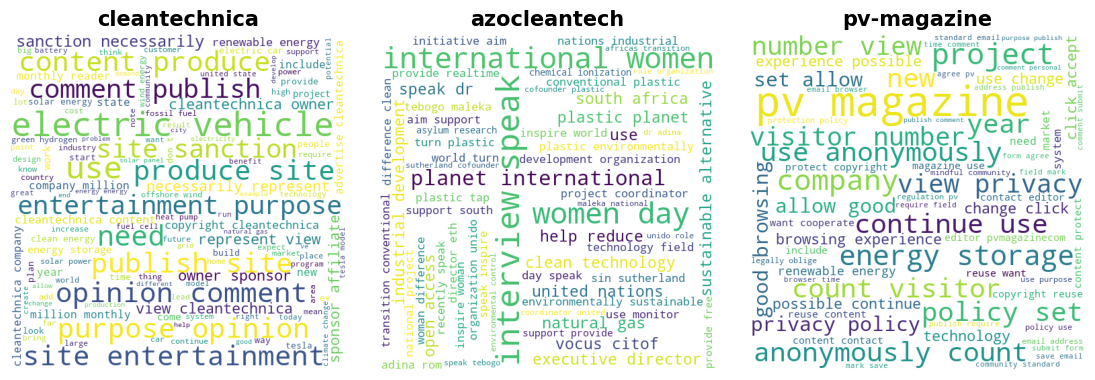

In [199]:
stop_words_spacy = set(stop_words_spacy)
additional_stop_words = ["s", "cookie", "setting", "datum", "website", "azocleantech"]

stop_words_spacy.update(additional_stop_words)

def stop_removal(df):
    stops_spacy = df['lemmatized_content'].apply(lambda x: [word for word in x if word.lower() not in stop_words_spacy])
    
    df['stops_spacy'] = stops_spacy
    
    df['final_cleaned'] = df['stops_spacy'].apply(lambda x: ' '.join(x))

    return df

df = stop_removal(df)

all_tokens_string = ' '.join(df['stops_spacy'].explode())

cleantechnica = df[df['domain'] == 'cleantechnica']['final_cleaned']
azocleantech = df[df['domain'] == 'azocleantech']['final_cleaned']
pv_magazine = df[df['domain'] == 'pv-magazine']['final_cleaned']

rows=1
cols=3

row=0
col=0
titles = ['cleantechnica', 'azocleantech', 'pv-magazine']
w = [cleantechnica.str.cat(),azocleantech.str.cat(),pv_magazine.str.cat(),]
fig, ax = plt.subplots(1, 3, figsize=(12.5,6.5))

for i in range(3):
  ax[col].imshow(WordCloud(width = 500, height = 500,
                background_color ='white',
                min_font_size = 10).generate(w[i]))
  ax[col].axis("off")
  ax[col].set_title(titles[i], fontdict={'fontsize': 15, 'fontweight' : 'bold'})
  row=row+1
  if row==rows:
     row=0
     col=col+1

plt.subplots_adjust(left=0.07, right=0.93, wspace=0.1, hspace=0.0,top=0.94,bottom=0.09)
plt.show()


### Type Token Ratio 

As part of the exploratory data analysis, we can calcualte the Type Token Ratio for each document. To do so we create a function that divide the number of unique tokens by the total number of tokens.

In [200]:
# Calculate TTR
def calculate_ttr(tokens):
    unique_tokens = set(tokens)
    ttr = len(unique_tokens) / len(tokens)
    
    return ttr

df['ttr'] = df['stops_spacy'].apply(calculate_ttr)

In [201]:
print(df[['ttr']])

           ttr
0     0.621622
1     0.722930
2     0.635678
3     0.682864
4     0.662338
...        ...
9602  0.771574
9603  0.700461
9604  0.720000
9605  0.541763
9606  0.748879

[9607 rows x 1 columns]


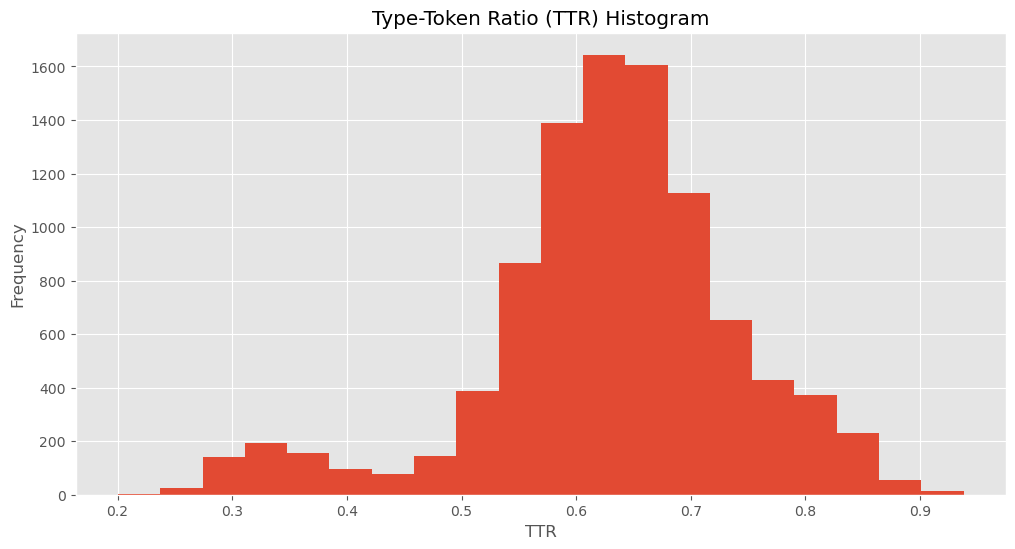

In [202]:
plt.figure(figsize=(12, 6))
plt.hist(df['ttr'], bins=20)  # You can adjust the number of bins as needed
plt.title('Type-Token Ratio (TTR) Histogram')
plt.xlabel('TTR')
plt.ylabel('Frequency')
plt.show()

Most documents have a TTR around 0.6-0.7, this indicates the documents are in general not very lexically diverse. There is another smaller group of documents that have a much higher lexical diversity at around 0.3 TTR.

In [203]:
# Add 'content length'
#df['content Length'] = df['content'].astype(str).apply(len)

# We already have content length, it is the word count column

df['num_tokens'] = df['stops_spacy'].apply(lambda x: len(x))

# Add polarity
df['polarity'] = df['content_cleaned'].map(lambda text: TextBlob(str(text)).sentiment.polarity)

In [30]:
# Descriptive statistics of your dataframe
df.describe()

word_count          ttr   num_tokens     polarity
count  9607.000000  9607.000000  9607.000000  9607.000000
mean    761.734152     0.629396   424.993546     0.124826
std     448.680542     0.112366   240.868089     0.061608
min     193.000000     0.200397    87.000000    -0.247789
25%     424.000000     0.578630   242.000000     0.084147
50%     648.000000     0.636542   367.000000     0.120312
75%     980.000000     0.694133   546.000000     0.161567
max    2984.000000     0.937888  1747.000000     0.466667

In [31]:
# Take a look at our new features
df.iloc[0][['num_tokens', 'polarity']]

num_tokens         259
polarity      0.067613
Name: 0, dtype: object

We also applied a simple sentiment analysis to the articles to roughly determine whether they are mainly positive or negative. The plot below shows the distribution of sentiment polarity. A positive number indicates a mainly positive sentiment, while a negative number indicates a more negative sentiment.

Text(0.5, 1.0, 'Polarity distribution')

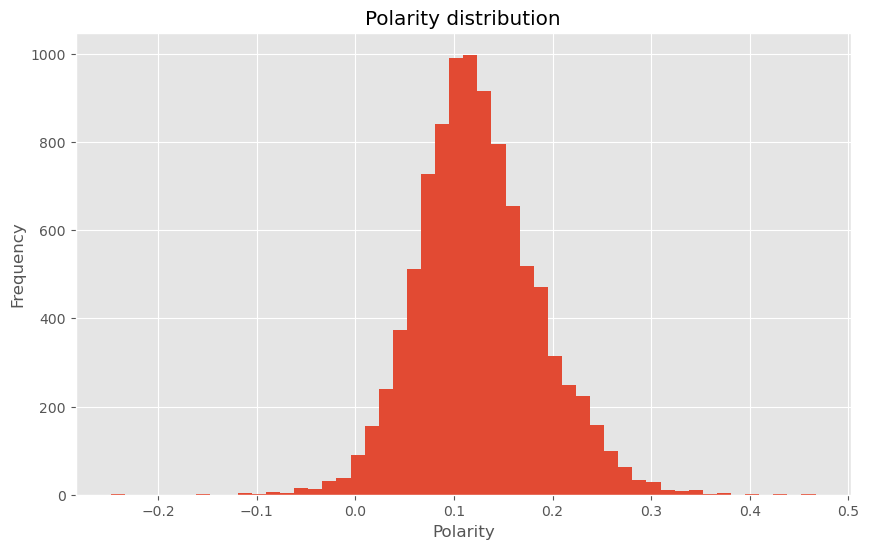

In [33]:
# Plot the distribution of polarity sentiment score
# change plotting colors per client request
plt.style.use('ggplot')
df['polarity'].plot(kind='hist', bins=50)
plt.xlabel('Polarity')
plt.title('Polarity distribution')

We can see that in general the articles are fairly neutral, which is typical of mor objective/scientific text.

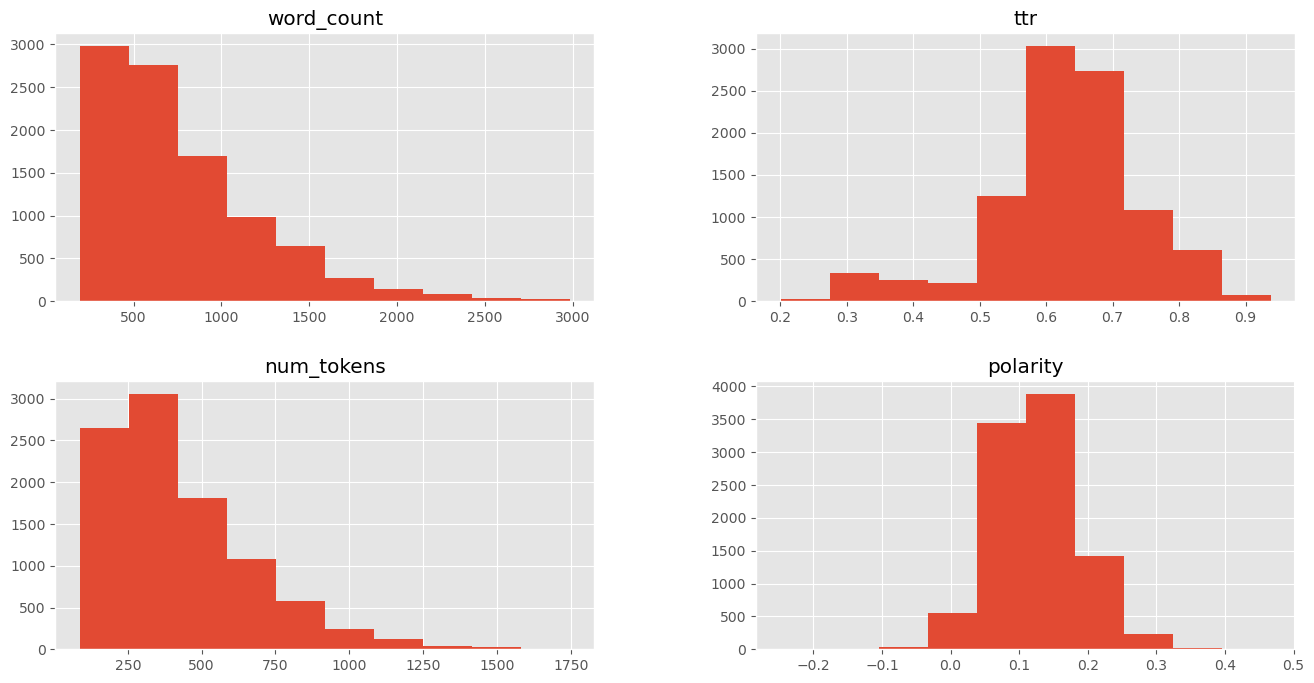

In [34]:
df.hist(figsize=(16,8));

## BERTopic Modelling

BERTopic is trained on normal un-processed text. Because of this it is not recommended to used tokenized or lemmatised text to train a BERTopic model. So we will instead use the unprocessed content of each article.

In [204]:
contents = df["content"]
titles = df["title"]

In [36]:
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.representation import KeyBERTInspired, MaximalMarginalRelevance, PartOfSpeech
from bertopic import BERTopic

2023-11-27 01:14:56.649902: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


For BERTopic modelling we first pre-calculate the embeddings for our documents so that we don't need to re-calculate them each time we want to run the model. This makes it easier to adjust parameters later on. Our articles are on average about 500 words long, which means that the sentence transformer embedder should work well on most of them to calculate the embeddings. However some articles are on the longer side and may contain multiple paragraphs. If the topic modelling is not very succesful we could consider breaking these documents up into paragaphs or sentences before calculating the embeddings.

In [286]:
# Pre-calculate embeddings
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = embedding_model.encode(contents, show_progress_bar=True)

Batches:   0%|          | 0/301 [00:00<?, ?it/s]

The next step creates the models to be used in the BERTopic pipeline.

- UMAP: An algorithm to reduce dimensionality.
    - n_neighbors = 15
    - n_components = 5
    - min_dist=0.0
    
    
- HDBSCAN: Clustering algorithm. 
    - min_cluster_size = 35

- Vectorizer: Improves representations by removing stop words and ignoring infrequent words.
    - ngram_range = (1,2) This will allow two word pairs such as "solar power".
  
The following models were used to gain different representations of topics, as part of a multi-aspect topic modelling procedure. These may give different perspectives/further insights into topics:
  
- KeyBERTInspired
- PartOfSpeech
- MaximalMarginalRelevance



In [296]:
#Umap model - dimensionality reduction
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=42)

#hdbscan model - clustering algorithm
hdbscan_model = HDBSCAN(min_cluster_size=35, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

#vectorizer model
vectorizer_model = CountVectorizer(stop_words="english", min_df=2, ngram_range=(1, 2))

# KeyBERT
keybert_model = KeyBERTInspired()

# Part-of-Speech
pos_model = PartOfSpeech("en_core_web_sm")

# MMR
mmr_model = MaximalMarginalRelevance(diversity=0.3)

# All representation models
representation_model = {
    "KeyBERT": keybert_model,
    "MMR": mmr_model,
    "POS": pos_model
}
topic_model = BERTopic(

  # Pipeline models
  embedding_model=embedding_model,
  umap_model=umap_model,
  hdbscan_model=hdbscan_model,
  vectorizer_model=vectorizer_model,
  representation_model=representation_model,

  # Hyperparameters
  top_n_words=10,
  verbose=True
)

topics, probs = topic_model.fit_transform(contents, embeddings)

In [297]:
topic_model = BERTopic(

  # Pipeline models
  embedding_model=embedding_model,
  umap_model=umap_model,
  hdbscan_model=hdbscan_model,
  vectorizer_model=vectorizer_model,
  representation_model=representation_model,

  # Hyperparameters
  top_n_words=10,
  verbose=True
)

topics, probs = topic_model.fit_transform(contents, embeddings)

2023-11-28 23:47:26,325 - BERTopic - Reduced dimensionality
2023-11-28 23:47:26,803 - BERTopic - Clustered reduced embeddings


In [298]:
topic_model.get_topic_info()

Topic  Count                                        Name  \
0      -1   3750                   -1_energy_solar_power_new   
1       0    681  0_geothermal_geothermal energy_energy_heat   
2       1    608                1_tesla_electric_charging_ev   
3       2    425        2_hydrogen_green_green hydrogen_fuel   
4       3    378               3_gas_lng_natural gas_natural   
5       4    338          4_azocleantech_women_spoke_plastic   
6       5    336      5_climate_azocleantech_change_research   
7       6    245             6_battery_batteries_lithium_ion   
8       7    244                   7_solar_energy_project_mw   
9       8    223             8_solar_manufacturing_pv_supply   
10      9    211                   9_solar_pv_energy_website   
11     10    181                 10_cell_pv_perovskite_solar   
12     11    145            11_dn media_dn_media group_media   
13     12    140      12_plastic_plastics_waste_azocleantech   
14     13    139                13_net zero_zero_net_climate   
15     14    135    14_storage_battery_energy_energy storage   
16     15    126     15_wind_offshore_offshore wind_scotland   
17     16    124      16_cleantechnica_energy_published_wind   
18     17    107               17_climate_energy_clean_biden   
19     18     91             18_carbon_co2_capture_emissions   
20     19     87                  19_share_units_plugin_bevs   
21     20     86    20_storage_energy_energy storage_battery   
22     21     84                        21_rigs_rig_week_gas   
23     22     71         22_wind_offshore_offshore wind_boem   
24     23     67                23_bcf_gas_cents_natural gas   
25     24     66                  24_north sea_sea_north_oil   
26     25     61                    25_green_eco_home_people   
27     26     61                26_eu_european_energy_europe   
28     27     59      27_australia_energy_australian_project   
29     28     56                 28_india_solar_indian_power   
30     29     55                  29_wind_solar_power_energy   
31     30     51     30_wind_offshore_offshore wind_floating   
32     31     50        31_bike_bikes_cleantechnica_electric   
33     32     44      32_biomass_azocleantech_research_spoke   
34     33     43           33_mexico_gas_natural gas_natural   
35     34     39  34_solar_california_metering_rooftop solar   

                                                                                         Representation  \
0                                 [energy, solar, power, new, storage, pv, said, wind, renewable, data]   
1   [geothermal, geothermal energy, energy, heat, project, drilling, heating, development, power, ge...   
2       [tesla, electric, charging, ev, vehicle, cleantechnica, vehicles, car, electric vehicle, model]   
3       [hydrogen, green, green hydrogen, fuel, energy, gas, production, ammonia, carbon, azocleantech]   
4                                   [gas, lng, natural gas, natural, said, ngi, daily, oil, news, year]   
5   [azocleantech, women, spoke, plastic, interview, planet, international women, women day, planet ...   
6          [climate, azocleantech, change, research, climate change, women, spoke, carbon, food, water]   
7   [battery, batteries, lithium, ion, lithium ion, ion batteries, electric, energy, storage, materi...   
8   [solar, energy, project, mw, projects, community, renewable, power, renewable energy, community ...   
9                  [solar, manufacturing, pv, supply, capacity, domestic, energy, industry, gw, module]   
10                         [solar, pv, energy, website, africa, data, power, mw, magazine, pv magazine]   
11                [cell, pv, perovskite, solar, cells, efficiency, modules, data, solar cells, website]   
12                [dn media, dn, media group, media, group, recharge, read, privacy, data, recharge dn]   
13        [plastic, plastics, waste, azocleantech, recycling, packaging, materials, spoke, women, used]   
14                     [net ze

We can we that the model has generated 34 topic representations. The topic labelled -1 contains all the documents that could not be classified by the model. These are the outlier topics.

At first glance there are some indications that the topic modelling could use some refinement as there appear to be a number of redundant topics. We could potentially improve this by adjusting some of the UMAP or HDBSCAN parameters. 

We can first take a close look at a representative document from Topic 1, to see if the topic was correctly identified, which should contain articles about geothermal energy.

In [299]:
representative_docs = topic_model.get_representative_docs(topic=0)
representative_docs[0][:500]

'["The Western Governors \' Association has published recommendations to accelerate deployment of geothermal technologies in the Western U.S.", \'As part of the bipartisan Heat Beneath Our Feet initiative, the Western Governors’ Association ( WGA) has published a comprehensive report detailing the group’ s recommendations and strategies to accelerate the deployment of geothermal technologies across the Western U.S. states. The full report can be viewed here. The Heat Beneath Our Feet initiative was'

The article is indeed about geothermal energy, so it appears BERTopic was successful in modelling the topic of this article. 

Below we can see the all the representations from the different models for this topic.

In [300]:
topic_model.get_topic(0, full=True)

{'Main': [('geothermal', 0.07611920581302213),
  ('geothermal energy', 0.027775654757297274),
  ('energy', 0.02545317727383527),
  ('heat', 0.014865774678361716),
  ('project', 0.013759223223528952),
  ('drilling', 0.013062642165534539),
  ('heating', 0.012885690433487855),
  ('development', 0.012571136245014021),
  ('power', 0.011875079217246374),
  ('geothermal power', 0.0097533214627091)],
 'KeyBERT': [('geothermal energy', 0.7841434),
  ('geothermal resources', 0.7777415),
  ('geothermal development', 0.76860654),
  ('geothermal projects', 0.757878),
  ('geothermal power', 0.7552707),
  ('geothermal', 0.74225277),
  ('geothermal project', 0.7355925),
  ('geothermal heating', 0.72884685),
  ('geothermal systems', 0.6934819),
  ('deep geothermal', 0.6299157)],
 'MMR': [('geothermal', 0.07611920581302213),
  ('geothermal energy', 0.027775654757297274),
  ('energy', 0.02545317727383527),
  ('heat', 0.014865774678361716),
  ('project', 0.013759223223528952),
  ('drilling', 0.01306264216

In [303]:
# change topic label
keybert_topic_labels = {topic: " | ".join(list(zip(*values))[0][:3]) for topic, values in topic_model.topic_aspects_["KeyBERT"].items()}
topic_model.set_topic_labels(keybert_topic_labels)

We can now take a look at the approximated topic distributions of a specific article to better analyse our model's performance.

In [304]:
topic_distr, _ = topic_model.approximate_distribution(contents, window=8, stride=4)

100%|███████████████████████████████████████████| 10/10 [01:25<00:00,  8.58s/it]


In [333]:
content_id = 900
print(contents[content_id])

['Equinor has approved a final investment decision ( FID) on the Blandford Road battery storage project in the UK, the first of several UK developments said to be on the cards.', 'The scheme will be built under a strategic partnership between Equinor and Noriker Power, a flexible power developer in which the company made an equity investment last year.', 'In addition to its 45% equity share of the company, Equinor agreed a strategic cooperation framework with Noriker which grants it the opportunity to directly participate in projects the company develops.', 'It has already built over 250MW of large-scale battery and hybrid facilities, though the Blandford Road scheme is the first project from its pipeline that Equinor has matured to an investment decision.', 'The 25MW / 50 MWh battery storage plant will be built in Dorset, England. The project will use CATL lithium-ion battery racks and connect to SSE’ s distribution network, providing capability to manage power intermittency, balance 

In [334]:
topic_model.visualize_distribution(topic_distr[content_id], custom_labels=True)

The model seems to successfully identify that the main topics of the article are energy storage and battery technology.

Our topic model generated a large number of outliers. We will run an outlier reduction technique to try and assign these articles to topics.

In [341]:
# Reduce outliers with pre-calculate embeddings instead
new_topics = topic_model.reduce_outliers(contents, topics, strategy="embeddings", embeddings=embeddings)

In [342]:
topic_model.update_topics(contents, topics=new_topics)

In [343]:
topic_model.get_topic_info()

Topic  Count                             Name  \
0      -1      1   -1_you_medical_insurance_plans   
1       0    839          0_geothermal_the_of_and   
2       1    698            1_the_and_electric_to   
3       2    439          2_hydrogen_the_to_green   
4       3    386            3_gas_lng_natural_the   
5       4    340    4_azocleantech_women_spoke_to   
6       5    444                  5_the_of_to_and   
7       6   1113               6_solar_the_and_to   
8       7    267           7_solar_energy_and_the   
9       8    225                8_solar_the_in_of   
10      9    223                9_the_pv_solar_to   
11     10    194                10_cell_the_pv_of   
12     11    168       11_dn_media_group_recharge   
13     12    140       12_plastic_the_to_plastics   
14     13    471             13_the_to_and_energy   
15     14    161        14_and_storage_to_battery   
16     15    128    15_wind_offshore_scotland_the   
17     16    124      16_cleantechnica_the_and_of   
18     17    436                 17_the_to_and_of   
19     18    146             18_carbon_the_to_and   
20     19     99            19_the_share_units_in   
21     20    111         20_storage_energy_the_to   
22     21    222              21_rigs_rig_oil_the   
23     22    132          22_wind_offshore_the_of   
24     23     67         23_bcf_gas_cents_natural   
25     24     67              24_the_sea_north_of   
26     25     67              25_you_your_and_the   
27     26     63                  26_eu_the_to_of   
28     27   1063                 27_the_to_of_and   
29     28     59               28_india_of_to_has   
30     29    385               29_wind_the_of_and   
31     30     79         30_wind_offshore_the_and   
32     31     50  31_bike_bikes_cleantechnica_the   
33     32     76                 32_the_to_and_of   
34     33     85        33_mexico_gas_the_natural   
35     34     39       34_solar_california_the_to   

                                                           CustomName  \
0                    renewable energy | solar energy | energy storage   
1   geothermal energy | geothermal resources | geothermal development   
2                  ev charging | electric vehicles | electric vehicle   
3                green hydrogen | hydrogen fuel | hydrogen production   
4                        natural gas | naturalgasintel com | gas news   
5       azocleantech | azocleantech recently | interview azocleantech   
6                         ecosystems | environmental | climate change   
7                   ev batteries | ion batteries | battery technology   
8                       solar projects | solar energy | solar project   
9                 solar industry | solar manufacturing | solar panels   
10                           mw solar | renewable energy | renewables   
11                           solar cell | solar cells | photovoltaics   
12                             dn media | news provider | media group   
13                      plastic waste | recycling | plastic pollution   
14                         zero emissions | sustainability | net zero   
15                          energy storage | battery energy | battery   
16                          offshore wind | wind projects | wind farm   
17        renewable energy | future cleantechnica | cleantech focused   
18                   climate change | renewable energy | clean energy   
19                 carbon capture | carbon emissions | carbon markets   
20                            ev sales | auto market | electrics bevs   
21                energy storage | battery storage | renewable energy   
22                                  rig decline | rig count | gas rig   
23                      offshore wind | wind industry | wind projects   
24                                 gas futures | gas prices | futures   
25                                   offshore | north sea | petroleum   
26                        sustainability | eco friendly | sustainable  

Below we can see from the intertopic distance map that a number of the topic clusters overlap one another. This is another indication that there may be some redundant topics in our model.

In [344]:
topic_model.visualize_topics(custom_labels=True)

In [346]:
reduced_embeddings = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
topic_model.visualize_documents(titles, reduced_embeddings=reduced_embeddings, custom_labels=True, hide_annotations=True)